In [ ]:
!pip install transformers torch nltk matplotlib sentence-transformers



--- Processing Text1 ---



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu
Your max_length is set to 150, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

T5 Summary:
the rapid advancements in artificial intelligence have sparked both excitement and concern . there are growing fears about the ethical implications, job displacement, and the potential misuse of AI technology . as society grapples with these challenges, it's clear that while AI has vast potential, its development must be approached with caution .



config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu
Your max_length is set to 150, but your input_length is only 93. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


BART Summary:
The rapid advancements in artificial intelligence have sparked both excitement and concern. On one hand, AI promises to revolutionize industries, from healthcare to finance, by improving efficiency, accuracy, and productivity. On the other hand, there are growing fears about the ethical implications, job displacement, and the potential misuse of AI technology. As society grapples with these challenges, it's clear that while AI has vast potential, its development must be approached with caution and responsibility.



Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu
Your max_length is set to 150, but your input_length is only 92. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)


Pegasus Summary:
In our series of letters from African journalists, film-maker, and columnist Ahmed Rashid looks at some of the key issues surrounding artificial intelligence and its potential impact on the world around us, as well as some of the best examples of how the technology is being used.



tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

T5 Paraphrase:
What are the challenges facing industry in view of the rapid advancement of Artificial Intelligence?



tokenizer_config.json:   0%|          | 0.00/332 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

BART Paraphrase:
Paraphrase: The rapid advancements in artificial intelligence have sparked both excitement and concern. On one hand, AI promises to revolutionize industries, from healthcare to finance, by improving efficiency, accuracy and productivity. On the other hand, there are growing fears about the ethical implications, job displacement and the potential misuse of AI technology.



tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

Pegasus Paraphrase:
The rapid advances in artificial intelligence have sparked both excitement and concern: On one hand, AI promises to revolutionize industries from healthcare to finance by improving efficiency, accuracy, and productivity; on the other hand, there are growing fears about the ethical implications, the loss of jobs, and the potential misuse of AI technology. As society grapples with these challenges, it is clear that while AI has enormous potential, its development must be approached with caution and responsibility .


--- Processing Text2 ---



Device set to use cpu
Your max_length is set to 150, but your input_length is only 123. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


T5 Summary:
the amazon rainforest is the largest tropical rainforest in the world . deforestation due to logging, agriculture, and mining is threatening this delicate ecosystem . Efforts are being made globally to protect the amazon, but challenges remain .



Device set to use cpu
Your max_length is set to 150, but your input_length is only 113. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=56)
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


BART Summary:
The Amazon rainforest, often referred to as the "lungs of the Earth," is the largest tropical rainforest in the world. It is home to an incredibly diverse range of plant and animal species, many of which are found nowhere else. The forest also plays a vital role in regulating the global climate by absorbing large amounts of carbon dioxide. However, deforestation due to logging, agriculture, and mining is threatening this delicate ecosystem. Efforts are being made globally to protect the Amazon, but challenges remain due to political, economic, and social factors.



Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu
Your max_length is set to 150, but your input_length is only 108. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=54)


Pegasus Summary:
The Amazon rainforest, often referred to as the "lungs of the Earth", is the largest tropical rainforest in the world, home to an incredibly diverse range of plant and animal species, many of which are found nowhere else. The Amazon rainforest, often referred to as the "lungs of the Earth", is the largest tropical rainforest in the world, home to an incredibly diverse range of plant and animal species, many of which are found nowhere else.

T5 Paraphrase:
This rainforest is the largest in the world, and it provides millions of unique species of plants and animals. It also protects the environment by providing a steady flow of clean, clean air and low pollution.

BART Paraphrase:
Paraphrase: The Amazon rainforest, often referred to as the lungs of the Earth, is home to an incredibly diverse range of plant and animal species, many of which are found nowhere else. But deforestation is threatening this delicate ecosystem. Efforts are being made globally to protect the Amaz

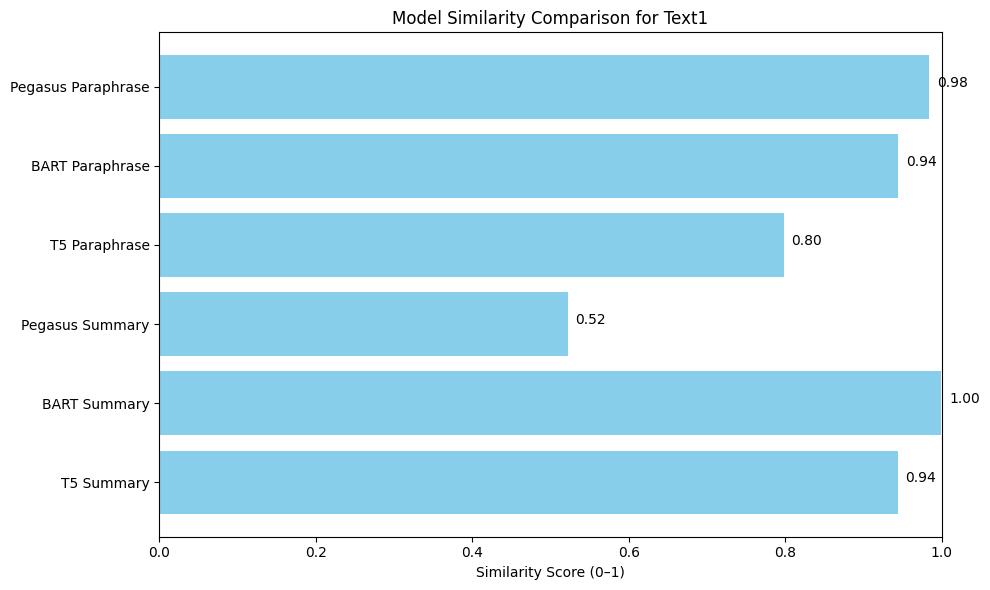

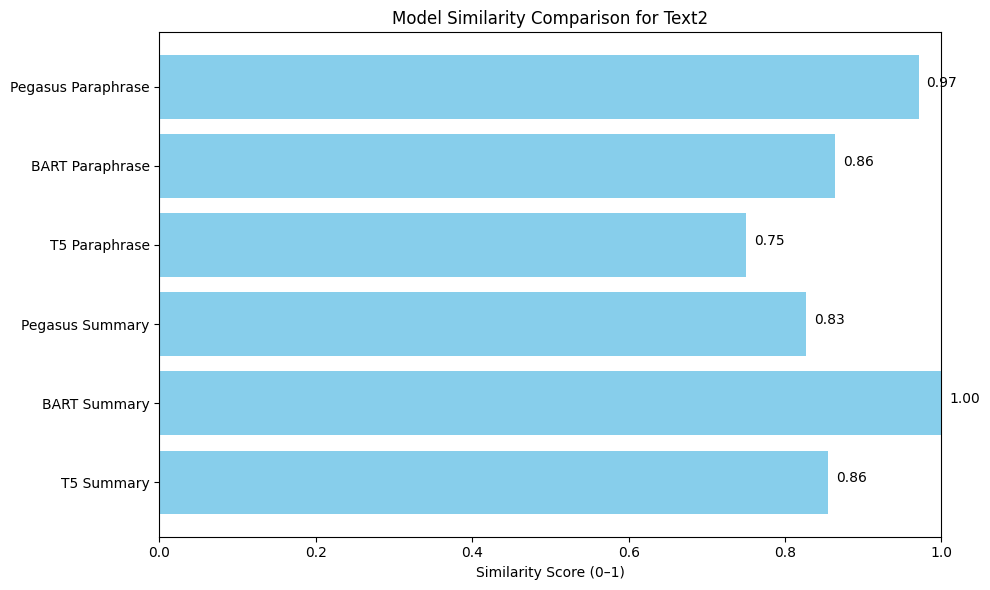

In [ ]:
import os
import nltk
import matplotlib.pyplot as plt
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM
from sentence_transformers import SentenceTransformer, util

# Download tokenizer data
nltk.download('punkt')

# Load two text files
def load_texts(file1, file2):
    with open(file1, 'r', encoding='utf-8') as f1, open(file2, 'r', encoding='utf-8') as f2:
        return f1.read(), f2.read()

# Summarization pipelines
def summarize_with_model(text, model_name, max_length=150, min_length=50):
    summarizer = pipeline("summarization", model=model_name)
    return summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)[0]['summary_text']

# Paraphrasing using seq2seq model
def paraphrase_with_model(text, model_name):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

    input_text = "paraphrase: " + text + " </s>"
    encoding = tokenizer.encode_plus(input_text, padding='longest', return_tensors="pt")
    outputs = model.generate(
        input_ids=encoding["input_ids"],
        attention_mask=encoding["attention_mask"],
        max_length=256,
        do_sample=True,
        top_k=120,
        top_p=0.95,
        num_return_sequences=1
    )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Similarity scoring
def similarity_score(original, generated):
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
    emb1 = model.encode(original, convert_to_tensor=True)
    emb2 = model.encode(generated, convert_to_tensor=True)
    return float(util.pytorch_cos_sim(emb1, emb2)[0])

# Main workflow
def main():
    file1 = "Sample1.txt"
    file2 = "Sample2.txt"
    text1, text2 = load_texts(file1, file2)

    inputs = {"Text1": text1, "Text2": text2}

    # Models
    summarization_models = {
        "T5": "t5-base",
        "BART": "facebook/bart-base",
        "Pegasus": "google/pegasus-xsum"
    }

    paraphrasing_models = {
        "T5": "ramsrigouthamg/t5_paraphraser",
        "BART": "eugenesiow/bart-paraphrase",
        "Pegasus": "Vamsi/T5_Paraphrase_Paws"
    }

    results = {}

    # Apply models
    for name, text in inputs.items():
        results[name] = {"summary": {}, "paraphrase": {}, "similarity": {}}

        print(f"\n--- Processing {name} ---\n")

        # Summarization
        for model_name, model_path in summarization_models.items():
            summary = summarize_with_model(text, model_path)
            sim = similarity_score(text, summary)
            results[name]["summary"][model_name] = summary
            results[name]["similarity"][f"{model_name} Summary"] = sim
            print(f"{model_name} Summary:\n{summary}\n")

        # Paraphrasing
        for model_name, model_path in paraphrasing_models.items():
            paraphrase = paraphrase_with_model(text, model_path)
            sim = similarity_score(text, paraphrase)
            results[name]["paraphrase"][model_name] = paraphrase
            results[name]["similarity"][f"{model_name} Paraphrase"] = sim
            print(f"{model_name} Paraphrase:\n{paraphrase}\n")

    # Plotting results
    for text_key in inputs:
        similarities = results[text_key]["similarity"]
        labels = list(similarities.keys())
        scores = list(similarities.values())
        plt.figure(figsize=(10, 6))
        plt.barh(labels, scores, color='skyblue')
        plt.xlabel("Similarity Score (0–1)")
        plt.title(f"Model Similarity Comparison for {text_key}")
        plt.xlim(0, 1)
        for index, value in enumerate(scores):
            plt.text(value + 0.01, index, f"{value:.2f}")
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    main()
